**MBAN 6110: Data Science I Final Exam**

- Submitted By: Mahin Bindra
- Student Number: 220089330

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from scipy.stats import zscore
from scipy.stats import skew, kurtosis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('/Users/mahinbindra/Downloads/conversion_data.csv')

In [3]:
df.head()

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
0,0,1,North America,youtube,M,4,5,2,1,2,...,33,23,46,57,4,5,5,4,6,1
1,1,2,South America,organic,F,2,5,0,1,5,...,28,39,24,51,5,6,7,6,2,0
2,2,3,Australia,instagram,M,3,4,0,-3,5,...,34,22,34,31,1,3,3,2,3,1
3,3,4,North America,facebook,M,1,0,0,5,0,...,26,43,22,39,3,4,7,7,1,0
4,4,5,Asia,instagram,F,1,5,2,2,3,...,54,30,47,57,6,6,5,2,4,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2000 non-null   int64  
 1   visitor_id         2000 non-null   int64  
 2   visitor_location   2000 non-null   object 
 3   marketing_channel  2000 non-null   object 
 4   gender             2000 non-null   object 
 5   product_views_Mon  2000 non-null   int64  
 6   product_views_Tue  2000 non-null   int64  
 7   product_views_Wed  2000 non-null   int64  
 8   product_views_Thu  2000 non-null   int64  
 9   product_views_Fri  2000 non-null   int64  
 10  avg_rating_Mon     2000 non-null   float64
 11  avg_rating_Tue     2000 non-null   float64
 12  avg_rating_Wed     2000 non-null   float64
 13  avg_rating_Thu     2000 non-null   float64
 14  avg_rating_Fri     2000 non-null   float64
 15  avg_price_Mon      2000 non-null   float64
 16  avg_price_Tue      2000 

In [5]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,2000.0,NaN,NaN,NaN,999.5,577.494589,0.0,499.75,999.5,1499.25,1999.0
visitor_id,2000.0,NaN,NaN,NaN,1000.5,577.494589,1.0,500.75,1000.5,1500.25,2000.0
visitor_location,2000,5,South America,433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marketing_channel,2000,5,instagram,431,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,2000,2,F,1093,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_views_Mon,2000.0,NaN,NaN,NaN,2.5415,1.704914,0.0,1.0,3.0,4.0,5.0
product_views_Tue,2000.0,NaN,NaN,NaN,2.4405,1.715206,0.0,1.0,2.0,4.0,5.0
product_views_Wed,2000.0,NaN,NaN,NaN,2.441,2.343345,0.0,0.0,2.0,4.0,9.0
product_views_Thu,2000.0,NaN,NaN,NaN,2.2565,2.370974,-4.0,0.0,2.0,5.0,8.0
product_views_Fri,2000.0,NaN,NaN,NaN,2.354,2.335682,-3.0,0.0,2.0,5.0,8.0


In [6]:
# Drop column unnamed: 0 as it does not provide any meaningful information
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [12]:
df.head()

,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,avg_rating_Mon,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
0,1,North America,youtube,M,4,5,2,1,2,3.90,...,33,23,46,57,4,5,5,4,6,1
1,2,South America,organic,F,2,5,0,1,5,1.31,...,28,39,24,51,5,6,7,6,2,0
2,3,Australia,instagram,M,3,4,0,-3,5,3.26,...,34,22,34,31,1,3,3,2,3,1
3,4,North America,facebook,M,1,0,0,5,0,2.66,...,26,43,22,39,3,4,7,7,1,0
4,5,Asia,instagram,F,1,5,2,2,3,2.76,...,54,30,47,57,6,6,5,2,4,1


In [13]:
# univariate analysis
df.groupby('converted_Fri').count()

,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,avg_rating_Mon,...,time_on_site_Mon,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri
converted_Fri,,,,,,,,,,,,,,,,,,,,,
0,1256,1256,1256,1256,1256,1256,1256,1256,1256,1256,...,1256,1256,1256,1256,1256,1256,1256,1256,1256,1256
1,744,744,744,744,744,744,744,744,744,744,...,744,744,744,744,744,744,744,744,744,744


In [17]:
df['converted_Fri'].value_counts()

converted_Fri
0    1256
1     744
Name: count, dtype: int64

In [18]:
df.columns

Index(['visitor_id', 'visitor_location', 'marketing_channel', 'gender',
       'product_views_Mon', 'product_views_Tue', 'product_views_Wed',
       'product_views_Thu', 'product_views_Fri', 'avg_rating_Mon',
       'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri',
       'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu',
       'avg_price_Fri', 'time_on_site_Mon', 'time_on_site_Tue',
       'time_on_site_Wed', 'time_on_site_Thu', 'time_on_site_Fri',
       'pages_visited_Mon', 'pages_visited_Tue', 'pages_visited_Wed',
       'pages_visited_Thu', 'pages_visited_Fri', 'converted_Fri'],
      dtype='object')

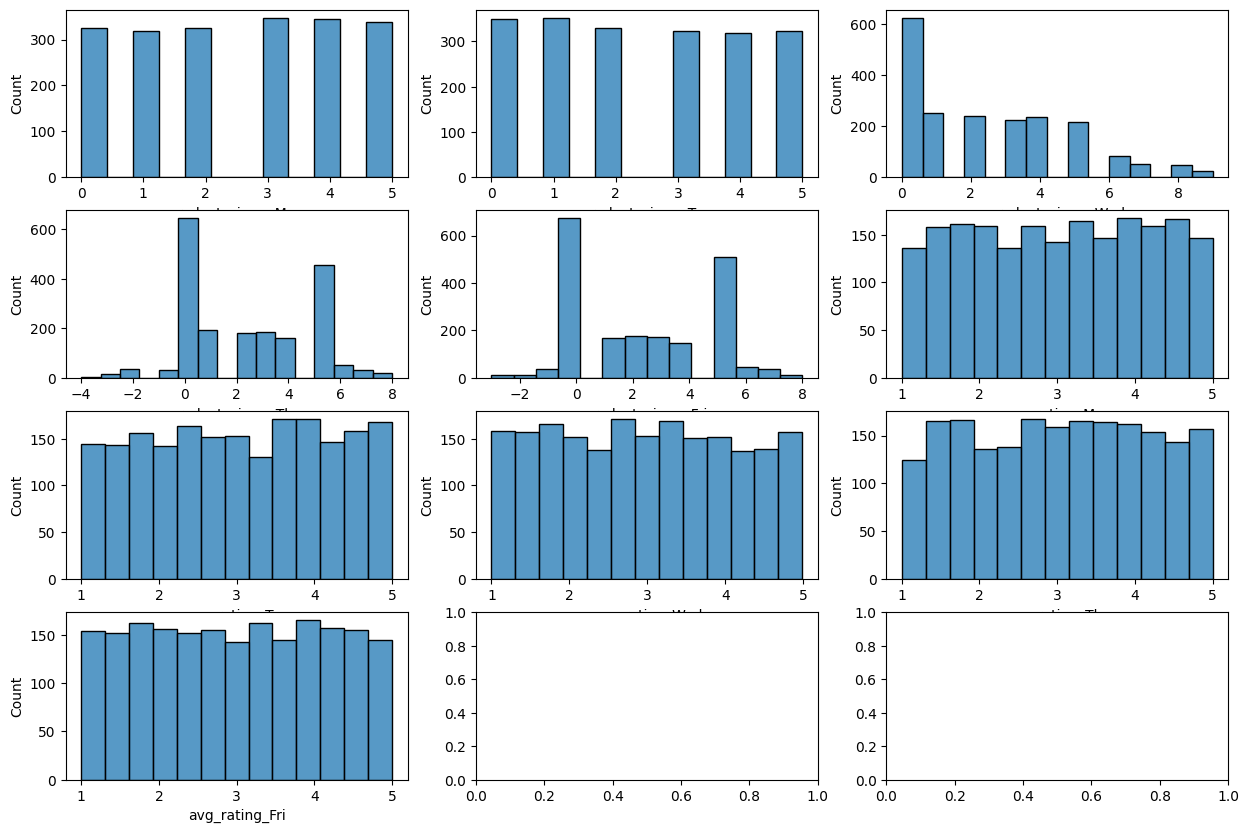

In [19]:
# check for continuous variables first

fig, axs = plt.subplots(4,3, figsize = (15,10))
plt1 = sns.histplot(df['product_views_Mon'], ax = axs[0,0])
plt2 = sns.histplot(df['product_views_Tue'], ax = axs[0,1])
plt3 = sns.histplot(df['product_views_Wed'], ax = axs[0,2])
plt4 = sns.histplot(df['product_views_Thu'], ax = axs[1,0])
plt5 = sns.histplot(df['product_views_Fri'], ax = axs[1,1])
plt6 = sns.histplot(df['avg_rating_Mon'], ax = axs[1,2])
plt7 = sns.histplot(df['avg_rating_Tue'], ax = axs[2,0])
plt8 = sns.histplot(df['avg_rating_Wed'], ax = axs[2,1])
plt9 = sns.histplot(df['avg_rating_Thu'], ax = axs[2,2])
plt10 = sns.histplot(df['avg_rating_Fri'], ax = axs[3,0])

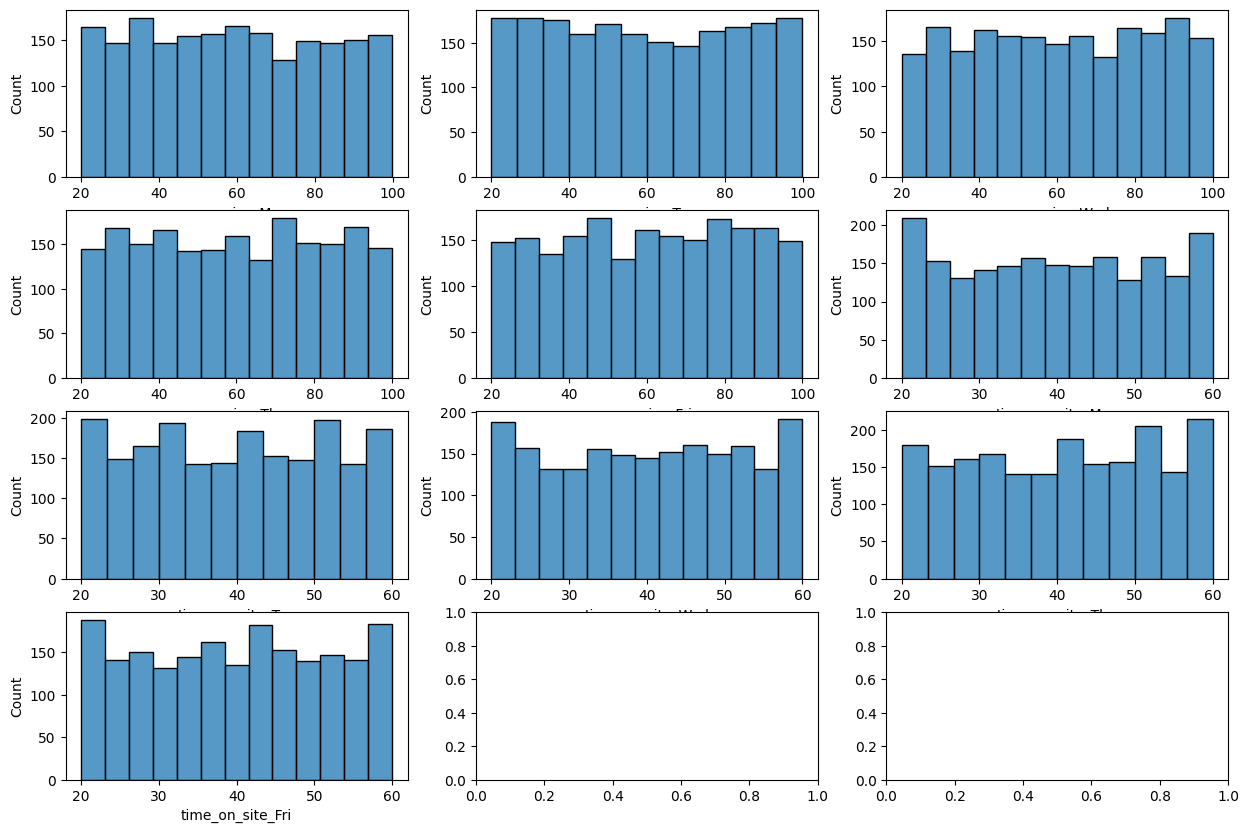

In [21]:
fig, axs = plt.subplots(4,3, figsize = (15,10))
plt1 = sns.histplot(df['avg_price_Mon'], ax = axs[0,0])
plt2 = sns.histplot(df['avg_price_Tue'], ax = axs[0,1])
plt3 = sns.histplot(df['avg_price_Wed'], ax = axs[0,2])
plt4 = sns.histplot(df['avg_price_Thu'], ax = axs[1,0])
plt5 = sns.histplot(df['avg_price_Fri'], ax = axs[1,1])
plt6 = sns.histplot(df['time_on_site_Mon'], ax = axs[1,2])
plt7 = sns.histplot(df['time_on_site_Tue'], ax = axs[2,0])
plt8 = sns.histplot(df['time_on_site_Wed'], ax = axs[2,1])
plt9 = sns.histplot(df['time_on_site_Thu'], ax = axs[2,2])
plt10 = sns.histplot(df['time_on_site_Fri'], ax = axs[3,0])

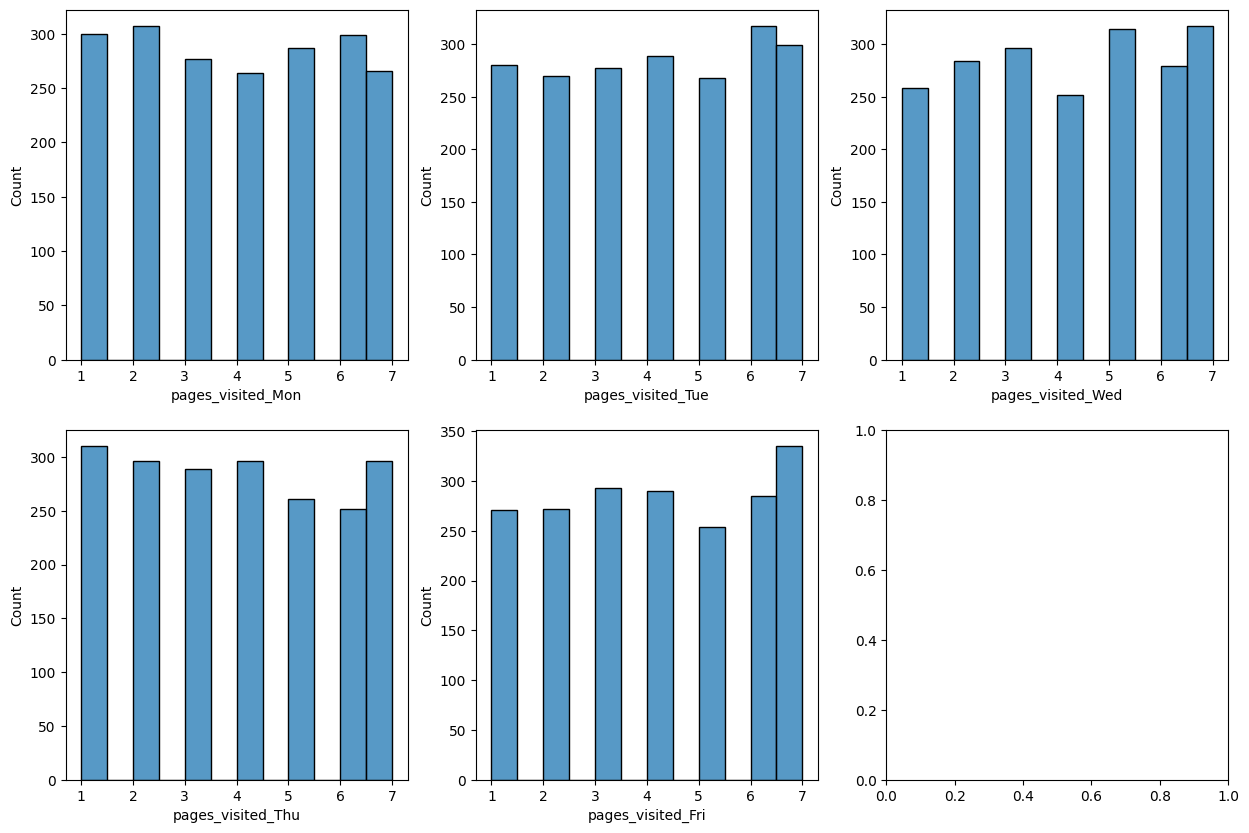

In [23]:
fig, axs = plt.subplots(2,3, figsize = (15,10))
plt1 = sns.histplot(df['pages_visited_Mon'], ax = axs[0,0])
plt2 = sns.histplot(df['pages_visited_Tue'], ax = axs[0,1])
plt3 = sns.histplot(df['pages_visited_Wed'], ax = axs[0,2])
plt4 = sns.histplot(df['pages_visited_Thu'], ax = axs[1,0])
plt5 = sns.histplot(df['pages_visited_Fri'], ax = axs[1,1])

<Axes: xlabel='converted_Fri', ylabel='avg_rating_Fri'>

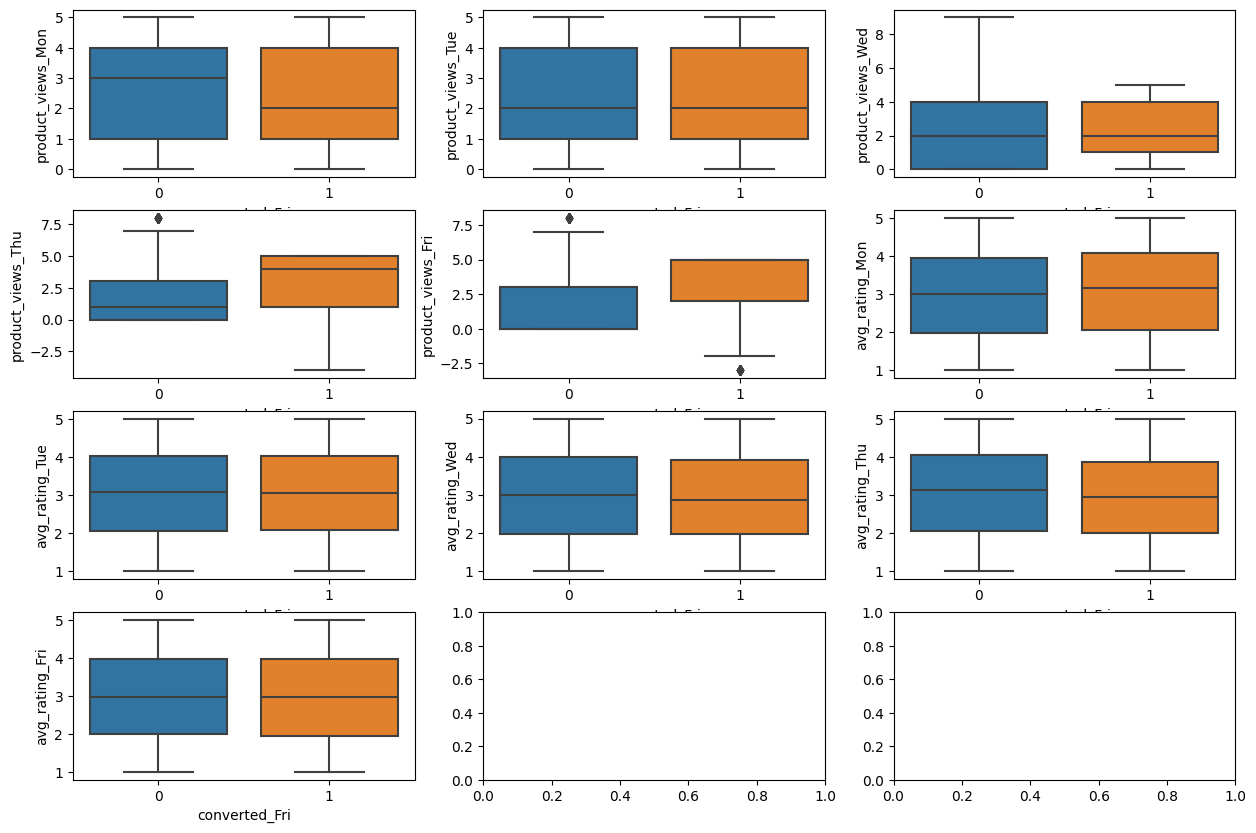

In [26]:
# check continuous variables first and compare them to output variable, which in this case is 'converted_fri'

fig, axs = plt.subplots(4,3, figsize = (15,10))
sns.boxplot(y = 'product_views_Mon', x = 'converted_Fri', data = df, ax = axs[0,0])
sns.boxplot(y = 'product_views_Tue', x = 'converted_Fri', data = df, ax = axs[0,1])
sns.boxplot(y = 'product_views_Wed', x = 'converted_Fri', data = df, ax = axs[0,2])
sns.boxplot(y = 'product_views_Thu', x = 'converted_Fri', data = df, ax = axs[1,0])
sns.boxplot(y = 'product_views_Fri', x = 'converted_Fri', data = df, ax = axs[1,1])
sns.boxplot(y = 'avg_rating_Mon', x = 'converted_Fri', data = df, ax = axs[1,2])
sns.boxplot(y = 'avg_rating_Tue', x = 'converted_Fri', data = df, ax = axs[2,0])
sns.boxplot(y = 'avg_rating_Wed', x = 'converted_Fri', data = df, ax = axs[2,1])
sns.boxplot(y = 'avg_rating_Thu', x = 'converted_Fri', data = df, ax = axs[2,2])
sns.boxplot(y = 'avg_rating_Fri', x = 'converted_Fri', data = df, ax = axs[3,0])

Based on the above boxplot product_views_wed, product_views_thu and product_views_fri seem to be important predictors, lets check the rest

<Axes: xlabel='converted_Fri', ylabel='time_on_site_Fri'>

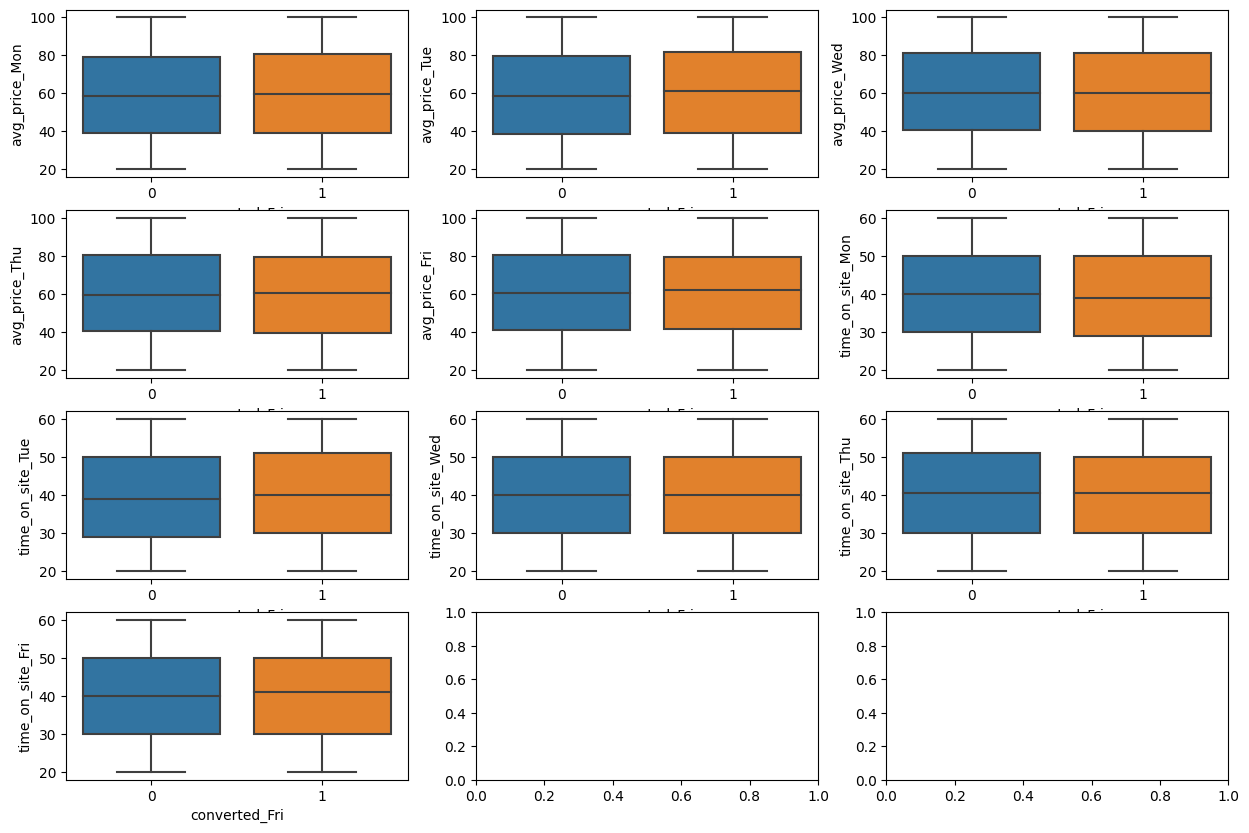

In [28]:
fig, axs = plt.subplots(4,3, figsize = (15,10))
sns.boxplot(y = 'avg_price_Mon', x = 'converted_Fri', data = df, ax = axs[0,0])
sns.boxplot(y = 'avg_price_Tue', x = 'converted_Fri', data = df, ax = axs[0,1])
sns.boxplot(y = 'avg_price_Wed', x = 'converted_Fri', data = df, ax = axs[0,2])
sns.boxplot(y = 'avg_price_Thu', x = 'converted_Fri', data = df, ax = axs[1,0])
sns.boxplot(y = 'avg_price_Fri', x = 'converted_Fri', data = df, ax = axs[1,1])
sns.boxplot(y = 'time_on_site_Mon', x = 'converted_Fri', data = df, ax = axs[1,2])
sns.boxplot(y = 'time_on_site_Tue', x = 'converted_Fri', data = df, ax = axs[2,0])
sns.boxplot(y = 'time_on_site_Wed', x = 'converted_Fri', data = df, ax = axs[2,1])
sns.boxplot(y = 'time_on_site_Thu', x = 'converted_Fri', data = df, ax = axs[2,2])
sns.boxplot(y = 'time_on_site_Fri', x = 'converted_Fri', data = df, ax = axs[3,0])

Based on the above boxplots, average price of the product and time spent on the website do not influence customer conversion. Lets check the last check of continous variables

In [29]:
df.columns

Index(['visitor_id', 'visitor_location', 'marketing_channel', 'gender',
       'product_views_Mon', 'product_views_Tue', 'product_views_Wed',
       'product_views_Thu', 'product_views_Fri', 'avg_rating_Mon',
       'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri',
       'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu',
       'avg_price_Fri', 'time_on_site_Mon', 'time_on_site_Tue',
       'time_on_site_Wed', 'time_on_site_Thu', 'time_on_site_Fri',
       'pages_visited_Mon', 'pages_visited_Tue', 'pages_visited_Wed',
       'pages_visited_Thu', 'pages_visited_Fri', 'converted_Fri'],
      dtype='object')

<Axes: xlabel='converted_Fri', ylabel='pages_visited_Fri'>

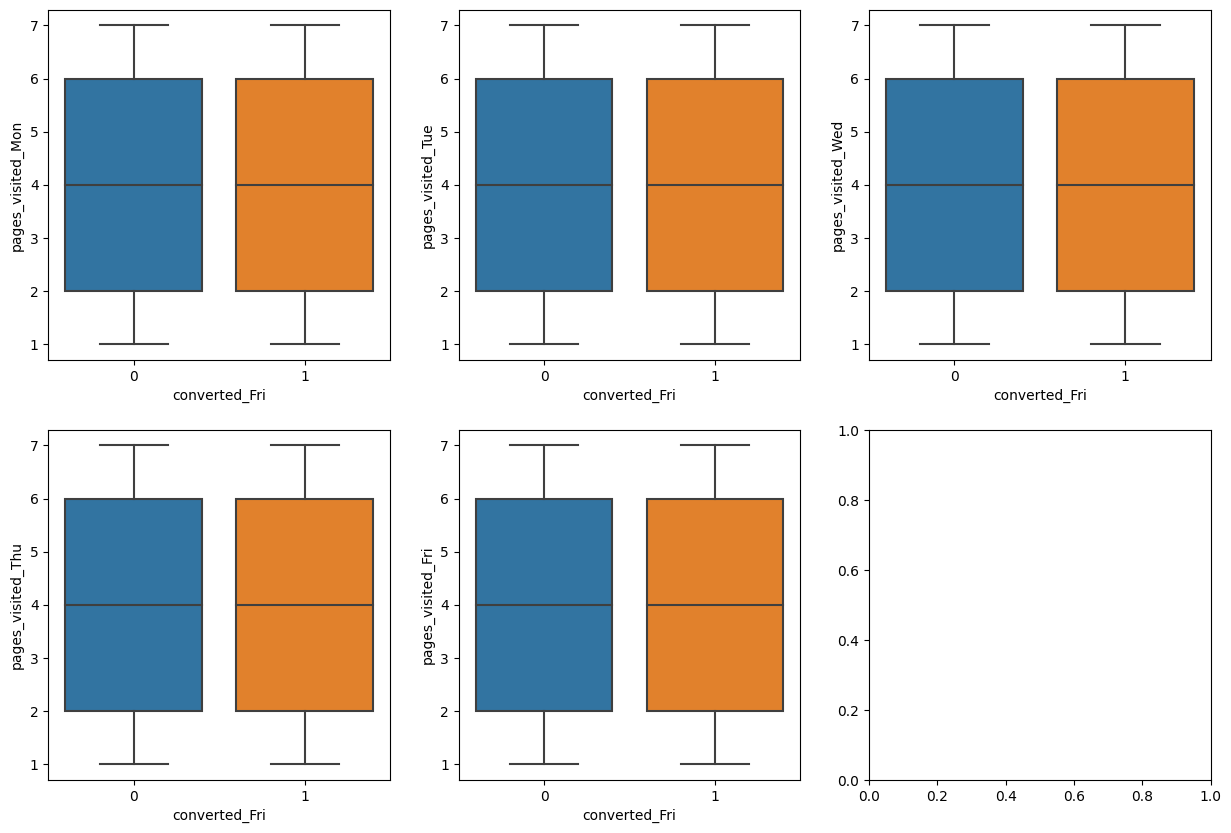

In [30]:
fig, axs = plt.subplots(2,3, figsize = (15,10))
sns.boxplot(y = 'pages_visited_Mon', x = 'converted_Fri', data = df, ax = axs[0,0])
sns.boxplot(y = 'pages_visited_Tue', x = 'converted_Fri', data = df, ax = axs[0,1])
sns.boxplot(y = 'pages_visited_Wed', x = 'converted_Fri', data = df, ax = axs[0,2])
sns.boxplot(y = 'pages_visited_Thu', x = 'converted_Fri', data = df, ax = axs[1,0])
sns.boxplot(y = 'pages_visited_Fri', x = 'converted_Fri', data = df, ax = axs[1,1])

The number of pages visited on the website on either days does not seem to impact customer conversion

Also, based on the boxplots there are no highly influential outliers in the continuous columns


So far, only the number of products viewed in the second half of the week (product_views_wed, product_views_thu and product_views_fri) seem to be important predictors

In [32]:
df.groupby(['converted_Fri', 'visitor_location'])['visitor_id'].count().unstack()

visitor_location,Asia,Australia,Europe,North America,South America
converted_Fri,,,,,
0,231,268,235,267,255
1,138,135,148,145,178


In [33]:
df.groupby(['converted_Fri', 'marketing_channel'])['visitor_id'].count().unstack()

marketing_channel,facebook,google,instagram,organic,youtube
converted_Fri,,,,,
0,238,234,257,311,216
1,156,165,174,96,153


In [34]:
df.groupby(['converted_Fri', 'gender'])['visitor_id'].count().unstack()

gender,F,M
converted_Fri,,
0,602,654
1,491,253


### Initial Hypothesis

All the categorical variables along with number of products viewed in the second half of the week can be strong predictors due to difference in conversion rates by different segments.

Based on the initial hypothesis, demographic attributes can potentially play a big impact in convsion rates of the customers as the differences in location, gender and marketing channels account for the different in customer segments. For examples, females might look for something particular while males might look for something else and the availability of products that cater to both segments on the website is essential. The number of products viewed can help customer assess whether what they are looking for is available on the website or not.

In [35]:
df[df['converted_Fri']==1].describe(include='all')

,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,avg_rating_Mon,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
count,744.000000,744,744,744,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,...,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.0
unique,NaN,5,5,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,South America,instagram,F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,178,174,491,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1024.198925,NaN,NaN,NaN,2.520161,2.497312,2.455645,3.080645,3.538978,3.080309,...,40.376344,40.142473,40.299731,40.470430,3.817204,4.118280,4.158602,3.940860,4.018817,1.0
std,576.022465,NaN,NaN,NaN,1.688253,1.726211,1.686993,2.441003,2.161971,1.147796,...,11.949345,11.588091,11.783384,11.669019,1.978736,1.972077,1.982183,2.047681,1.991143,0.0
min,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,-4.000000,-3.000000,1.000000,...,20.000000,20.000000,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
25%,519.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,2.000000,2.067500,...,30.000000,30.000000,30.000000,30.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.0
50%,1039.500000,NaN,NaN,NaN,2.000000,2.000000,2.000000,4.000000,5.000000,3.160000,...,40.000000,40.000000,40.500000,41.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.0
75%,1513.000000,NaN,NaN,NaN,4.000000,4.000000,4.000000,5.000000,5.000000,4.090000,...,51.000000,50.000000,50.000000,50.000000,6.000000,6.000000,6.000000,6.000000,6.000000,1.0


In [36]:
df[df['converted_Fri']==0].describe(include='all')

,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,avg_rating_Mon,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
count,1256.000000,1256,1256,1256,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,...,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.0
unique,NaN,5,5,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Australia,organic,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,268,311,654,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,986.461783,NaN,NaN,NaN,2.554140,2.406847,2.432325,1.768312,1.652070,2.990629,...,39.421178,40.163217,40.486465,39.766720,4.022293,4.042994,4.053344,3.909236,4.131369,0.0
std,578.135706,NaN,NaN,NaN,1.715251,1.708451,2.657358,2.187538,2.144009,1.152111,...,11.790137,11.861133,11.961018,11.658099,2.025215,2.035869,2.014969,2.009470,2.047508,0.0
min,2.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,20.000000,20.000000,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0
25%,490.000000,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,1.980000,...,29.000000,30.000000,30.000000,30.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.0
50%,985.000000,NaN,NaN,NaN,3.000000,2.000000,2.000000,1.000000,0.000000,3.000000,...,39.000000,40.000000,40.500000,40.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.0
75%,1491.500000,NaN,NaN,NaN,4.000000,4.000000,4.000000,3.000000,3.000000,3.952500,...,50.000000,50.000000,51.000000,50.000000,6.000000,6.000000,6.000000,6.000000,6.000000,0.0


In [40]:
df2 = df.copy()

In [38]:
# Segmenting all the hypothesized important predictors as numerical and categorical
num_columns= ['product_views_Wed' , 'product_views_Thu', 'product_views_Fri']
cat_columns = ['visitor_location', 'marketing_channel', 'gender']
target ='converted_Fri'

In [39]:
cat_transformer = OneHotEncoder(handle_unknown='ignore')
num_transformer = StandardScaler()
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, cat_columns),
                                                 ('num', num_transformer, num_columns)])

In [113]:
X_train, X_test, y_train, y_test = train_test_split(df2[cat_columns + num_columns], df2[target], test_size=0.1, random_state=42)


In [114]:
x_train_transformed = preprocessor.fit_transform(X_train)
x_test_transformed = preprocessor.fit_transform(X_test)

In [115]:
x_train_transformed.shape

(1800, 15)

In [116]:
x_test_transformed.shape

(200, 15)

In [117]:
encoded_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_columns)
encoded_columns = encoded_columns.tolist()


In [118]:
all_feat = num_columns + encoded_columns
X_train_transformed = pd.DataFrame(x_train_transformed, columns=all_feat)
X_test_transformed = pd.DataFrame(x_test_transformed, columns=all_feat)

In [119]:
knn = KNeighborsClassifier()
knn_fit = knn.fit(X_train_transformed, y_train)
knn_pred = knn.predict(X_test_transformed)

In [120]:
print(f1_score(knn_pred, y_test))
print(accuracy_score(knn_pred, y_test))
print(precision_score(knn_pred, y_test))
print(recall_score(knn_pred, y_test))

0.7305389221556886
0.775
0.7011494252873564
0.7625


In [121]:
#Create all the other models models
log = LogisticRegression() 
nb = GaussianNB()
svc = SVC()

In [122]:
svc_fit = svc.fit(X_train_transformed, y_train)
svc_pred = svc.predict(X_test_transformed)

In [123]:
print(f1_score(svc_pred, y_test))
print(accuracy_score(svc_pred, y_test))
print(precision_score(svc_pred, y_test))
print(recall_score(svc_pred, y_test))

0.782051282051282
0.83
0.7011494252873564
0.8840579710144928


In [124]:
log_fit = log.fit(X_train_transformed, y_train)
log_pred = log.predict(X_test_transformed)

In [125]:
print(f1_score(log_pred, y_test))
print(accuracy_score(log_pred, y_test))
print(precision_score(log_pred, y_test))
print(recall_score(log_pred, y_test))

0.6410256410256409
0.72
0.5747126436781609
0.7246376811594203


In [126]:
nb_fit = nb.fit(X_train_transformed, y_train)
nb_pred = nb.predict(X_test_transformed)

In [127]:
print(f1_score(nb_pred, y_test))
print(accuracy_score(nb_pred, y_test))
print(precision_score(nb_pred, y_test))
print(recall_score(nb_pred, y_test))

0.7204968944099379
0.775
0.6666666666666666
0.7837837837837838


Based on an initial sythesis of the 4 predictive models [KNN, LogReg, NB and SVC] SVC seems to be performing the best on all metrics. We will however perform cross validation on each model to check for average performance before we move on to optimize our selected.

In [128]:
# Cross-validation for knn model
cv_scores_knn = cross_val_score(knn_fit, X_train_transformed, y_train, cv=10, scoring='f1')
print(f"Cross-Validation F1 Scores: {cv_scores_knn}")
print(f"Mean CV F1 Score: {cv_scores_knn.mean()}")

Cross-Validation F1 Scores: [0.703125   0.72580645 0.70149254 0.65079365 0.70769231 0.67716535
 0.65625    0.71212121 0.77777778 0.68253968]
Mean CV F1 Score: 0.6994763974181676


In [129]:
# Cross-validation for svc model
cv_scores_svc = cross_val_score(svc_fit, X_train_transformed, y_train, cv=10, scoring='f1')
print(f"Cross-Validation F1 Scores: {cv_scores_svc}")
print(f"Mean CV F1 Score: {cv_scores_svc.mean()}")

Cross-Validation F1 Scores: [0.69354839 0.77777778 0.76190476 0.73333333 0.796875   0.752
 0.74603175 0.76271186 0.81967213 0.76422764]
Mean CV F1 Score: 0.7608082643975136


In [130]:
# Cross-validation for logreg model
cv_scores_log = cross_val_score(log_fit, X_train_transformed, y_train, cv=10, scoring='f1')
print(f"Cross-Validation F1 Scores: {cv_scores_log}")
print(f"Mean CV F1 Score: {cv_scores_log.mean()}")

Cross-Validation F1 Scores: [0.62711864 0.6446281  0.63414634 0.59130435 0.62068966 0.65546218
 0.59016393 0.6440678  0.6446281  0.56896552]
Mean CV F1 Score: 0.6221174620028547


In [131]:
# Cross-validation for nb model
cv_scores_nb = cross_val_score(nb_fit, X_train_transformed, y_train, cv=10, scoring='f1')
print(f"Cross-Validation F1 Scores: {cv_scores_nb}")
print(f"Mean CV F1 Score: {cv_scores_nb.mean()}")

Cross-Validation F1 Scores: [0.56       0.61788618 0.640625   0.64566929 0.70229008 0.67741935
 0.62222222 0.72180451 0.74193548 0.67692308]
Mean CV F1 Score: 0.6606775195669422


Looking at the mean cross validation F1-score, SVC performs the best! We will go ahead and optimize that model using hyper parameter fine-tuning

We will fine-tune our model on precision as in this case False-positive is a higher concern than a false-negative. A wrong result could lead to customer churn i.e., loss of a customer, which can be harmful for the business.

In [187]:
svc_params = {'kernel':['linear','poly', 'rbf', 'sigmoid'], 'class_weight':[None, 'balanced']}

rs_svc = RandomizedSearchCV(svc_fit, svc_params, n_iter=200, cv=10, scoring='precision')
gridsearch_svc = GridSearchCV(svc, svc_params, cv=10, scoring='precision')

rs_svc.fit(X_train_transformed, y_train)
gridsearch_svc.fit(X_train_transformed, y_train)

rs_svc.best_estimator_

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=200. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


SVC(kernel='poly')

In [188]:
gridsearch_svc.best_estimator_

SVC(kernel='poly')

In [189]:
svc_best = SVC(kernel = 'poly', class_weight='balanced')

svc_best.fit(X_train_transformed, y_train)

pred_svc_best = svc_best.predict(X_test_transformed)

f1_score_svc = f1_score(pred_svc_best, y_test)
precision_svc = precision_score(pred_svc_best, y_test)
#recall_svc = recall_score(pred_svc_best, y_test)
#accuracy_svc = accuracy_score(pred_svc_best, y_test)

print("Precision:", precision_svc)
#print("Recall:", recall_svc)
#print("Accuracy:", accuracy_svc)
print("f1 score:", f1_score_svc)

Precision: 0.8390804597701149
f1 score: 0.8295454545454546


In [190]:
data = {'Model': ['SVC'],
        'Precision': [precision_svc],
        'F1-score': [f1_score_svc]}

results = pd.DataFrame(data)
results

,Model,Precision,F1-score
0,SVC,0.83908,0.829545


In [191]:
matrix_svc = confusion_matrix(y_test, pred_svc_best)
matrix_svc

array([[97, 16],
       [14, 73]])

In [197]:
from sklearn.metrics import confusion_matrix

<Axes: >

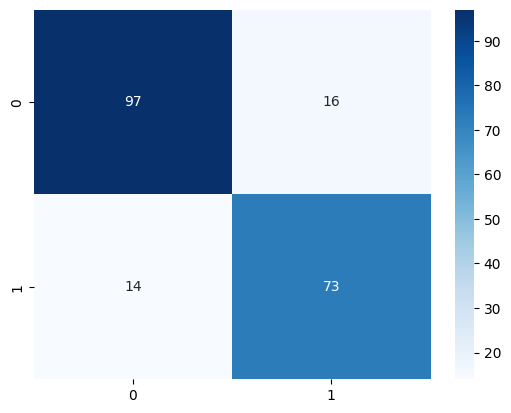

In [205]:
# confusion matric for SVC where x axis shows 'predicted' values and y axis 'true' values
sns.heatmap(matrix_svc, annot=True, cmap="Blues", fmt="d")

**Explain your model to a business executive.**

1. As there were multiple continous and categorical variables present within the data, it was essential to assess which attributes impact the conversion rate of a customer on friday. To assess their influence, I created histplots and boxplots. Based on the boxplots, I could deduce that the number of the products the customer viewed in the second half of the week i.e., on wednesday, thursday and friday could encourge them to convert. However, it was surprising to note that other behavioral factors such as (average ratings of the product, average price, number of pages visited and even time spent on the website) did not seem to influence their conversion behavior as depicted by no difference in conversion rate on the boxplots. 
- To assess the impact of the categorical variables, in this case, location of the visitor, marketing channel they used and gender I grouped them with the target variable. On doing so, I deduced that all these attributes could be strong predictors due to difference in conversion rates by these segments.
- The initial hypothesis was deemed to be true upon building the models and noting that most models had a decent f1_score and precision score (above 0.70) which is good as a starting point.

2. To buid the models, I started with onehot encoding all the categorical  and standardscale all the continuous strong predictors I identified during the intial hypothesis. Post which I partitioned my dataset into train and test split and then transformed my partitioned data using a preprocessor. 
Once that was done, I starting developing my models starting with KNearest Neighbor, followed by Logistic Regression, Gaussian Naive Bayes and Support Vector Machine Classifier. 
After developing the models, comparing the success metric of all models was essential to decide which one should I proceed with. Using metrics such as accuracy, F1-score, precision and recall score I could deduce that SVC model performs the best in predicting whether a customer converts or not. To further validate my analysis, I performed cross validation of F1-score and calculated mean scores of each model. Even based on that SVC performed the best with a Mean CV F1 Score of 0.76 as compared to other models.
-I then decided to fine-tune the SVC model using both RandomSearch and GridSearch method on precision score. I decided to use precision score as False-positive is a higher concern than a false-negative. A wrong result could lead to customer attrition which is not good for an e-commerce website with already declining conversion rates. Both techniques gave out 'poly' kernel as the best estimator which is used to enhance my SVC model. Post fine-tuning the model gave out a precision score of 0.83 which is an improvement over the initial score.

3. Based on the analysis, SVC predictive model works the best as compared to other models in predicting whether a consumer will convert based on last-week's data. This model is the best for the given situation as it gives out a higher precision score as compared to other models which was essential for us. SVC model when compared to other models is computationally less demanding, is more powerful to address non-linear problems and can predict faster than some models. 

4. The e-commerce website should deploy this model to predict whether a customer will convert by the week's end by looking at their weekly history, more specifically the number of products viewed in the second half as they can help decide the customer whether the e-commerce website contains stuff which is relevant for them or not. Using the demographical data as well, the e-commerce company can predict whether customer is expected to become a member or not. 
Using this analysis and information, the e-commerce company can devise various strategies to solve their business of declining conversions.

__*For customer who are expected to convert*__:
Since these customer have not converted yet, it is essential to get a head start using this model to ensure these consumers convert by the end of the week
- The company can offer personalized discounts of segments of products that the customer looked at during the week. For example, if a customer looked at multiple housekeeping items the company can offer discount coupons on such items through the marketing channel they logged in. Through this, the customer appreciated can increase and re-inforce their decision of becoming a member
- Ensure that geographical differences are accounted for by offering memberships at a cost which are the market standard at that time not having a consistent membership across the globe. This will ensure that customers can afford the membership across.
- Joining bonuses can help consumers strengthen their decision. By offering a discounted membership and additional perks as soon as they join which other e-commer websites are not offering can increase conversion rate

__*For customer who are not expected to convert*__
- Conducting market analysis to understand what is hindering their interest in becoming a member of the e-commerce website. The company can launch a survey to said customer to understand the drivers and barriers of the website. They can further assess teh expectations of customers. Using this information they can alter their strategies to cater to these customers as every conversion counts in a downfall sceanrio
- Try to competitive advantage: Building on the previos point further, the company can try to assess what other competitors are offering and the needs of the customers and devise a unique stratgy to stand out from the other. This will potentially lead to shift in the needle and customer not considering to convert to potentially considering becoming a member of the website.

**Using the predictive model and the stratgic recommendations that come with it, the e-commerce company can set themselves on the path of recovery and enhance their customer conversion rate.**
